In [9]:
import keras

In [10]:
import pandas as pd

In [12]:
df = pd.read_csv("/gpfs01/home/gicnn/project/Important/NSL_KDD-master/KDDTrain+.csv")

In [36]:
df2 = pd.read_csv("/gpfs01/home/gicnn/project/Important/NSL_KDD-master/KDDTest+.csv")

In [15]:
df = df.drop(labels=['normal', '20'], axis=1)

In [42]:
#df2 = df2.drop(labels=['neptune', '21'], axis=1)
df2.to_csv("/gpfs01/home/gicnn/project/Important/NSL_KDD-master/KDDTest.csv")

In [17]:
df.to_csv("/gpfs01/home/gicnn/project/Important/NSL_KDD-master/KDDTrain.csv")

In [19]:
with open("/gpfs01/home/gicnn/project/Important/NSL_KDD-master/KDDTrain.txt") as f:
    j = f.readlines()

In [43]:
with open("/gpfs01/home/gicnn/project/Important/NSL_KDD-master/KDDTest.txt") as l:
    k = l.readlines()

In [21]:
from keras.preprocessing.text import Tokenizer

In [23]:
tknzr = Tokenizer(num_words=None,filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ", char_level=False)

In [24]:
tknzr.fit_on_texts(j)

In [25]:
Training_Set = tknzr.texts_to_sequences(j)

In [44]:
Testing_Set = tknzr.texts_to_sequences(k)

In [26]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [32]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
import keras
import numpy as np
from keras import metrics
from keras.preprocessing.text import Tokenizer, text_to_word_sequence 

In [45]:
max_len = 41
print "max_len ", max_len
print('Pad sequences (samples x time)')
train_set = sequence.pad_sequences(Training_Set, maxlen=max_len)
test_set = sequence.pad_sequences(Testing_Set, maxlen=max_len)

max_len  41
Pad sequences (samples x time)


In [87]:
import pickle

with open("/gpfs01/home/gicnn/project/Important/NSL_KDD-master/incomplete_project-master/DBNKDD/dataset/NSL-KDD_Processed/Train_set_nsl.pickle","wb") as f:
    pickle.dump(train_set,f)
with open("/gpfs01/home/gicnn/project/Important/NSL_KDD-master/incomplete_project-master/DBNKDD/dataset/NSL-KDD_Processed/Test_set_nsl.pickle","wb") as g:
    pickle.dump(test_set,g)

In [81]:
optimizer_ = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0)

In [47]:
train_set.shape

(125973, 41)

In [49]:
test_set.shape

(22543, 41)

In [57]:
# Labels 
train_l = pd.read_csv("/gpfs01/home/gicnn/project/Important/NSL_KDD-master/incomplete_project-master/DBNKDD/dataset/NSL-KDD_Processed/NSL_TrainLabels_mat5.csv", header=None)
test_l = pd.read_csv("/gpfs01/home/gicnn/project/Important/NSL_KDD-master/incomplete_project-master/DBNKDD/dataset/NSL-KDD_Processed/NSL_TestLabels_mat5.csv", header=None)

In [58]:
import numpy as np

train_label = np.float32(train_l)
test_label = np.float32(test_l)

In [59]:
train_label.shape

(125973, 5)

In [60]:
test_label.shape

(22543, 5)

In [83]:
import keras
from keras import regularizers
from keras.callbacks import TensorBoard
max_features = 41
model = Sequential()
print('Build model...')
with tf.device('/gpu:1'):
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=41))
    model.add(keras.layers.SpatialDropout1D(0.2))
    model.add(keras.layers.LSTM(256, return_sequences=True))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.LSTM(128,return_sequences=True))
    model.add(keras.layers.Dropout(0.35))
    model.add(keras.layers.LSTM(128))
    #model.add(keras.layers.Dropout(0.1))
    model.add(Dense(5))
    model.add(Activation('softmax'))
    
    re = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=0, verbose=1, mode='auto', epsilon=0.0001, cooldown=0, min_lr=0)
    
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')
    
    #tbCallBack = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=False)
    
    #tbCallBack.set_model(model)
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer_,metrics=['accuracy'] )
    
    hist = model.fit(test_set, y=test_label, batch_size=1024,validation_split=0.05, epochs=50, verbose=1,callbacks=[re, early_stop])

Build model...
Train on 21415 samples, validate on 1128 samples
Epoch 1/50
21415/21415 [==============================] - 6s 265us/step - loss: 1.6089 - acc: 0.1816 - val_loss: 1.6088 - val_acc: 0.1445
Epoch 2/50
20480/21415 [===========================>..] - ETA: 0s - loss: 1.6089 - acc: 0.1788
Epoch 00002: reducing learning rate to 1.00000008274e-09.
21415/21415 [==============================] - 4s 185us/step - loss: 1.6089 - acc: 0.1792 - val_loss: 1.6088 - val_acc: 0.1445
Epoch 3/50
20480/21415 [===========================>..] - ETA: 0s - loss: 1.6089 - acc: 0.1792
Epoch 00003: reducing learning rate to 1.00000008274e-10.
21415/21415 [==============================] - 4s 185us/step - loss: 1.6088 - acc: 0.1799 - val_loss: 1.6088 - val_acc: 0.1445
Epoch 4/50


KeyboardInterrupt: 

In [66]:
from matplotlib import pyplot
pyplot.plot(hist.history['loss'])
pyplot.legend(['loss'], loc='upper right')
pyplot.show()

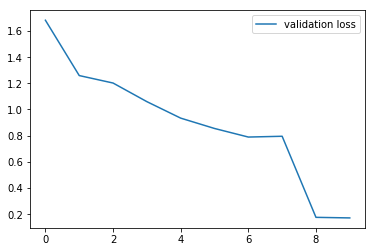

In [67]:
pyplot.plot(hist.history['val_loss'])
pyplot.legend(['validation loss'], loc='upper right')
pyplot.show()

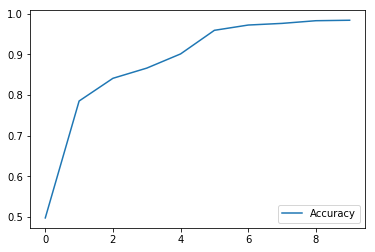

In [68]:
pyplot.plot(hist.history['acc'])
pyplot.legend(['Accuracy'], loc='lower right')
pyplot.show()

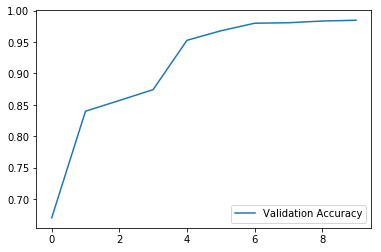

In [69]:
pyplot.plot(hist.history['val_acc'])
pyplot.legend(['Validation Accuracy'], loc='lower right')
pyplot.show()

In [72]:
scores = model.evaluate(train_set, train_label, verbose=1)

22543/22543 [==============================] - 23s 1ms/step


In [73]:
print("Accuracy of the Model is: {}".format(scores[1]*100))

Accuracy of the Model is: 75.868340509


In [75]:
# Finding the y_predicted value
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(train_set, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
y_true = np.argmax(train_label, axis=1)

In [76]:
print(confusion_matrix(y_true, y_pred))

[[9132  588  283    0    0]
 [ 956 6178   31    0    0]
 [ 318  310 1793    0    0]
 [2507  113  267    0    0]
 [  67    0    0    0    0]]


In [77]:
print(classification_report(y_true, y_pred, target_names = ['Normal', 'DoS', 'Probe', 'U2R', 'R2L']))

             precision    recall  f1-score   support

     Normal       0.70      0.91      0.79     10003
        DoS       0.86      0.86      0.86      7165
      Probe       0.76      0.74      0.75      2421
        U2R       0.00      0.00      0.00      2887
        R2L       0.00      0.00      0.00        67

avg / total       0.67      0.76      0.71     22543



/gpfs01/home/gicnn/.conda/envs/DeepMinDS/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
